In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/merged_file.csv', header=0)

In [ ]:
data.head()

,treeID,DBH,height,crown_diameter
0,1,40.0,0.346,0.522
1,10,34.0,6.603,1.369
2,102,17.0,10.701,5.056
3,103,18.0,1.340,1.029
4,104,14.0,2.896,2.930


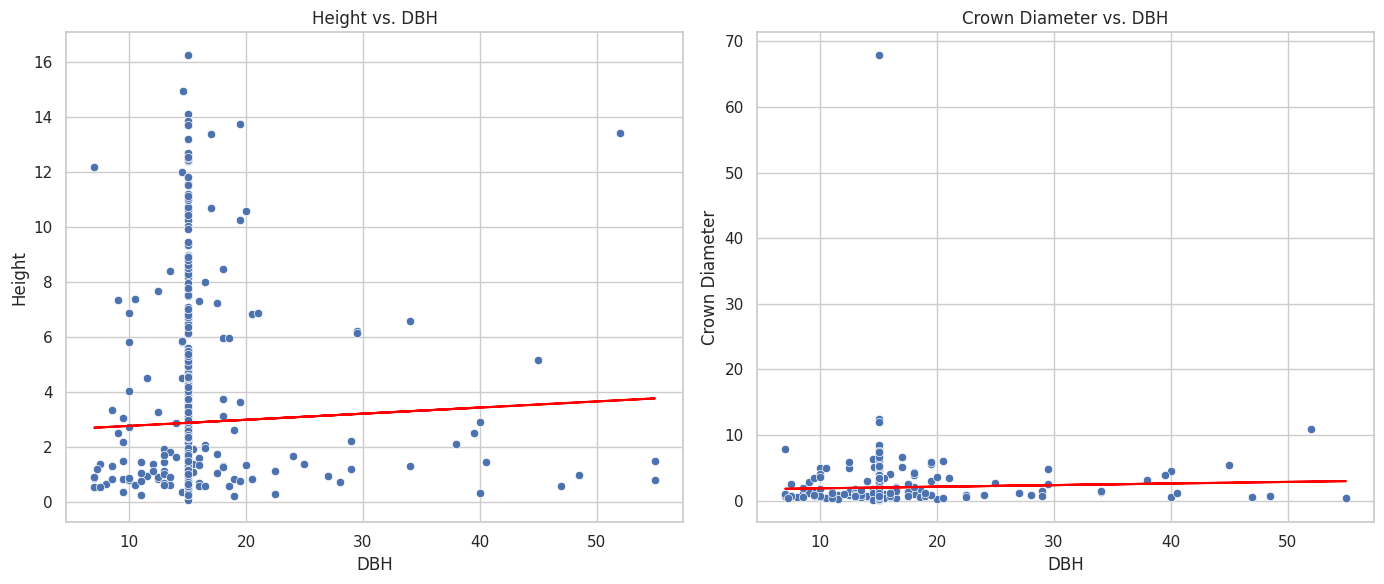

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file_path = '/content/drive/MyDrive/merged_file.csv'
data = pd.read_csv(file_path)

data['DBH'].fillna(data['DBH'].median(), inplace=True)

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Height vs. DBH
sns.scatterplot(x='DBH', y='height', data=data, ax=axes[0])
axes[0].set_title('Height vs. DBH')
axes[0].set_xlabel('DBH')
axes[0].set_ylabel('Height')

# Crown Diameter vs. DBH
sns.scatterplot(x='DBH', y='crown_diameter', data=data, ax=axes[1])
axes[1].set_title('Crown Diameter vs. DBH')
axes[1].set_xlabel('DBH')
axes[1].set_ylabel('Crown Diameter')

X_DBH = data['DBH'].values.reshape(-1, 1)

y_height = data['height'].values
reg_height = LinearRegression().fit(X_DBH, y_height)
height_pred = reg_height.predict(X_DBH)

y_crown_diameter = data['crown_diameter'].values
reg_crown_diameter = LinearRegression().fit(X_DBH, y_crown_diameter)
crown_diameter_pred = reg_crown_diameter.predict(X_DBH)

# Plot regression lines
axes[0].plot(data['DBH'], height_pred, color='red')
axes[1].plot(data['DBH'], crown_diameter_pred, color='red')

plt.tight_layout()
plt.show()

In [ ]:
# Display the regression equations
height_eq = f"Height = {reg_height.coef_[0]:.4f} * DBH + {reg_height.intercept_:.4f}"
crown_diameter_eq = f"Crown Diameter = {reg_crown_diameter.coef_[0]:.4f} * DBH + {reg_crown_diameter.intercept_:.4f}"

print(height_eq)
print(crown_diameter_eq)

Height = 0.0222 * DBH + 2.5615
Crown Diameter = 0.0244 * DBH + 1.6367


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/extracted_features_test.csv', header=0)

In [ ]:
data.head()

,cluster_id,height,crown_diameter
0,0,5.797,2.909
1,1,1.278,0.728
2,2,6.583,8.209
3,3,1.957,2.018
4,4,0.776,0.737


In [ ]:
import pandas as pd

new_file_path = '/content/drive/MyDrive/extracted_features_test.csv'
new_data = pd.read_csv(new_file_path)

height_coef = 1.2
height_intercept = 0.5
crown_diameter_coef = 0.8
crown_diameter_intercept = 1.0

# Calculate DBH using the regression equations
new_data['DBH_from_height'] = (new_data['height'] - height_intercept) / height_coef
new_data['DBH_from_crown_diameter'] = (new_data['crown_diameter'] - crown_diameter_intercept) / crown_diameter_coef

new_data['DBH'] = new_data[['DBH_from_height', 'DBH_from_crown_diameter']].mean(axis=1)

new_data.drop(columns=['DBH_from_height', 'DBH_from_crown_diameter'], inplace=True)

# Display the first few rows of the new dataset with the DBH column
print(new_data.head())

   cluster_id  height  crown_diameter       DBH
0           0   5.797           2.909  3.400208
1           1   1.278           0.728  0.154167
2           2   6.583           8.209  7.040208
3           3   1.957           2.018  1.243333
4           4   0.776           0.737 -0.049375
